In [29]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split



df = pd.read_csv('ToyotaCorolla.csv')
print(df.shape)

print(df.columns)

(1436, 39)
Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')


In [31]:
np.round(df.describe(),decimals=2)

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,...,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.0,1436.00,1436.00,1436.00
mean,721.56,10730.82,55.95,5.55,1999.63,68533.26,101.50,0.67,0.06,1576.86,...,0.56,0.98,0.15,0.26,0.30,0.77,0.2,0.15,0.00,0.28
std,416.48,3626.96,18.60,3.35,1.54,37506.45,14.98,0.47,0.23,424.39,...,0.50,0.15,0.35,0.44,0.46,0.42,0.4,0.35,0.05,0.45
min,1.00,4350.00,1.00,1.00,1998.00,1.00,69.00,0.00,0.00,1300.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,361.75,8450.00,44.00,3.00,1998.00,43000.00,90.00,0.00,0.00,1400.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00
50%,721.50,9900.00,61.00,5.00,1999.00,63389.50,110.00,1.00,0.00,1600.00,...,1.00,1.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00
75%,1081.25,11950.00,70.00,8.00,2001.00,87020.75,110.00,1.00,0.00,1600.00,...,1.00,1.00,0.00,1.00,1.00,1.00,0.0,0.00,0.00,1.00
max,1442.00,32500.00,80.00,12.00,2004.00,243000.00,192.00,1.00,1.00,16000.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


In [122]:
mean_price = df['Price'].mean()
median_price = df['Price'].median()


print(f"Mean of Price: {mean_price}")
print(f"Median of Price: {median_price}")

Mean of Price: 10730.824512534818
Median of Price: 9900.0


The median price is 9,900, which suggests that half of the cars are priced below 9,900 and half are priced above. 
This means that a significant portion of the cars are priced lower than the average price, i.e., 10730.
Therefore most cars are likely to be more affordable than the average is suggesting.
The average price can be influenced by a few high-priced cars(outliers), making it appear that cars are generally more expensive than they are. 

In [94]:
#Right Skewed - Mean > Median

In [95]:
mean_age = df['Age_08_04'].mean()
median_age = df['Age_08_04'].median()

print(f"Mean of Age: {mean_age}")
print(f"Median of Age: {median_age}")


Mean of Age: 55.94707520891365
Median of Age: 61.0


In [96]:
#Left Skewed - Mean < Median

In [97]:
#Right Skewed - Mean > Median

In [98]:
mean_hp = df['HP'].mean()
median_hp = df['HP'].median()


print(f"Mean of HP: {mean_hp}")
print(f"Median of HP: {median_hp}")

Mean of HP: 101.50208913649026
Median of HP: 110.0


In [99]:
#Left Skewed - Mean < Median

#If skewness > 0 (positive skew), the distribution is right-skewed.
#If skewness < 0 (negative skew), the distribution is left-skewed.
#If skewness ≈ 0, the distribution is approximately symmetric.

In [100]:
#the skewness calculation is a better indicator of the distribution shape

Skewness of Price: 1.702104639170028
Skewness of HP: 0.9548369218420583
Skewness of Age_08_04: -0.8258380758865862


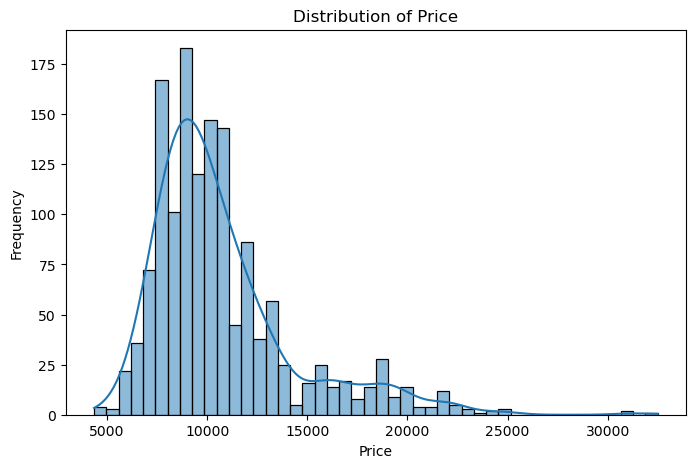

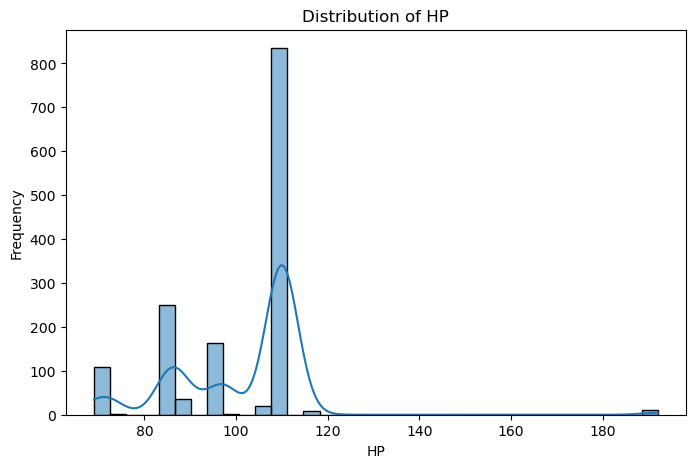

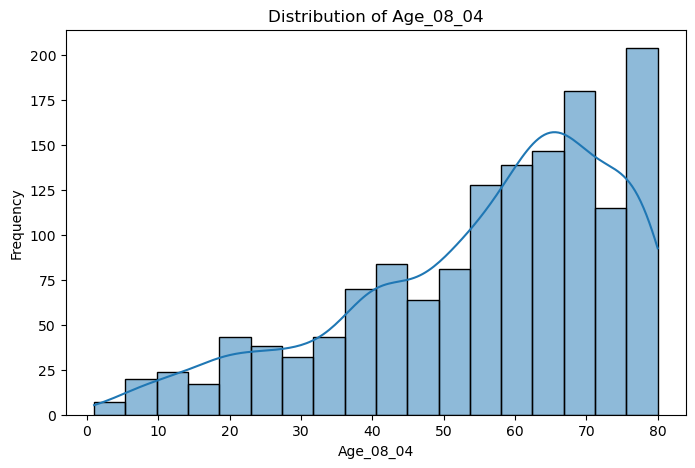

In [123]:




# List of continuous numerical columns to analyze for skewness
continuous_columns = ['Price', 'HP','Age_08_04']


for col in continuous_columns:
    skewness_value = skew(df[col].dropna())  # dropping NaN values 
    print(f"Skewness of {col}: {skewness_value}")


for col in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True)  
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


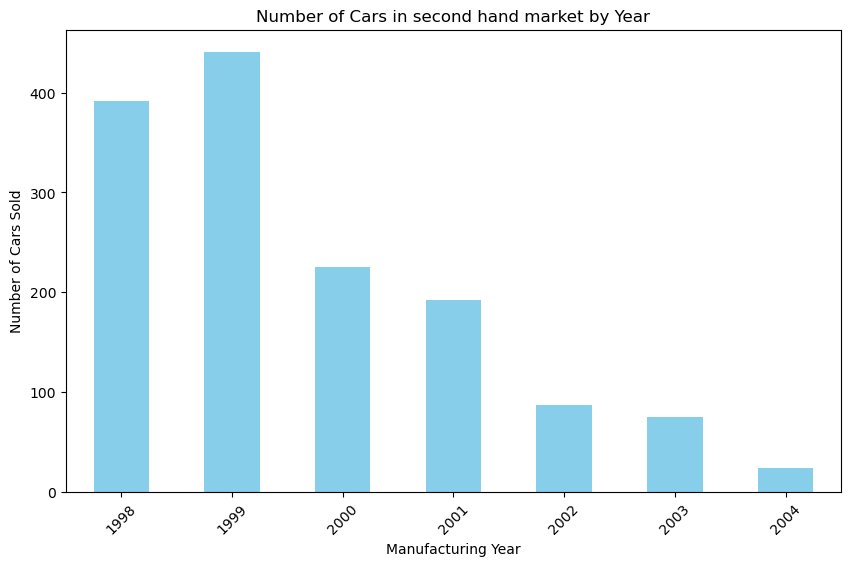

In [102]:
#Number of Cars in second hand market by Year
yearly_sales = df.groupby('Mfg_Year').size()


plt.figure(figsize=(10,6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Number of Cars in second hand market by Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

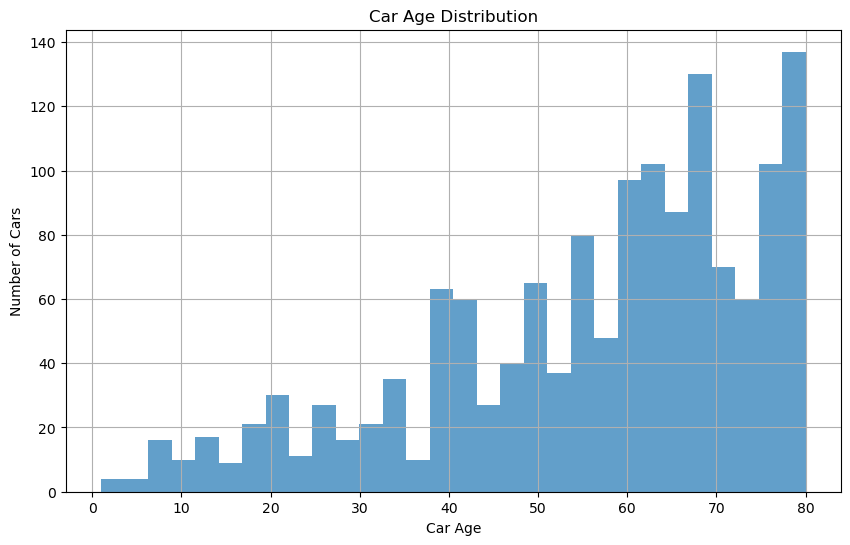

In [103]:
#Car Age Distribution 
plt.figure(figsize=(10, 6))
df['Age_08_04'].hist(bins=30, alpha=0.7)  

plt.xlabel("Car Age")
plt.ylabel("Number of Cars")
plt.title("Car Age Distribution")

plt.show()

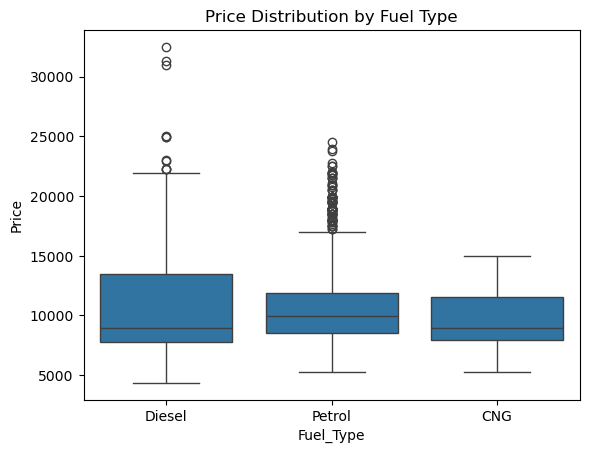

In [104]:
# Price distribution by fuel type
avg_price_model = df.groupby('Model')['Price'].mean()
fuel_type_count = df['Fuel_Type'].value_counts()
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Price Distribution by Fuel Type")
plt.show()

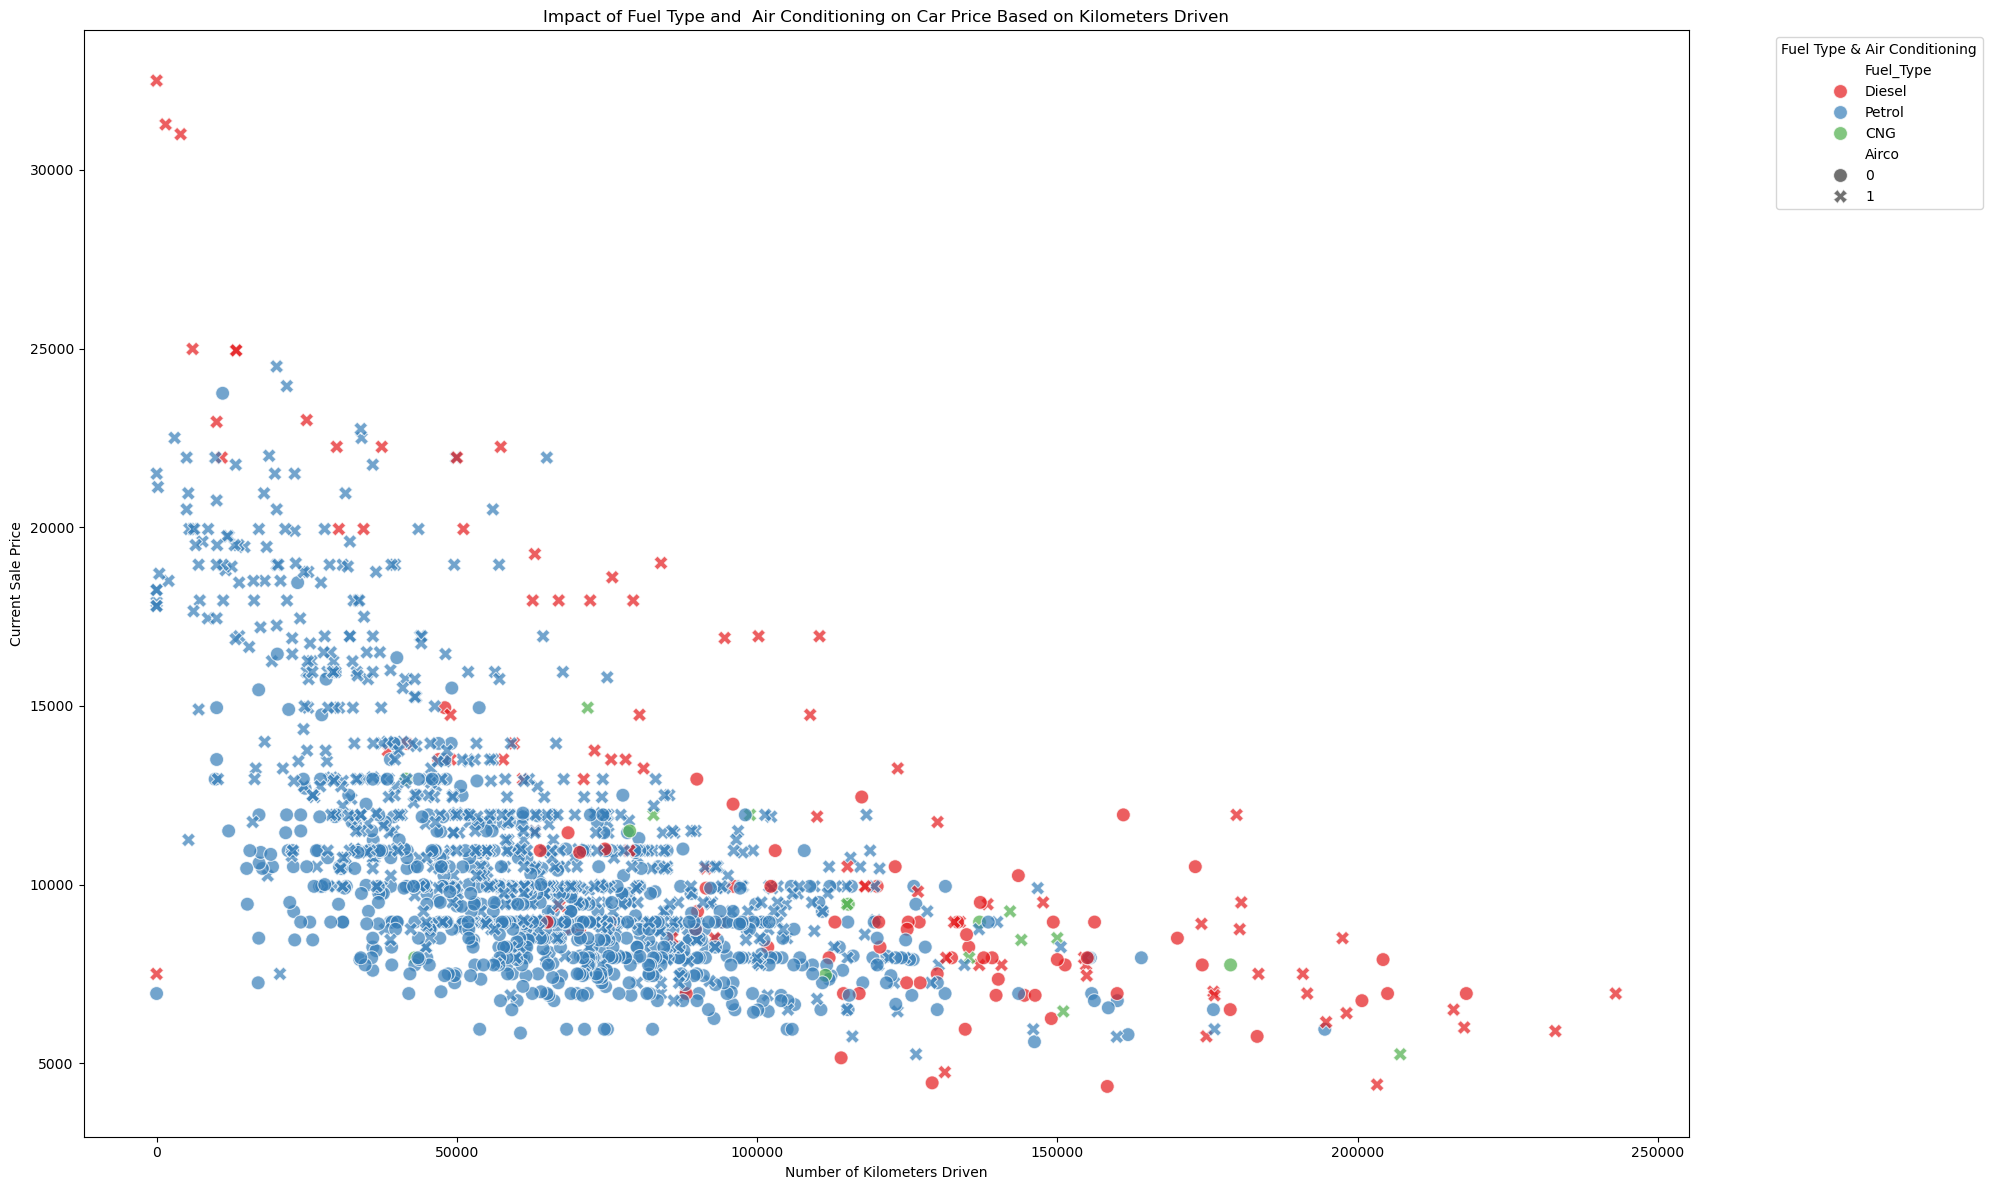

In [105]:
plt.figure(figsize=(20, 12))  
sns.scatterplot(x='KM', y='Price', data=df[['Price', 'KM', 'Fuel_Type', 'Airco']].dropna(), 
                hue='Fuel_Type', style='Airco', palette='Set1', s=100, alpha=0.7)  # Distinct palette, larger size, transparency

plt.title('Impact of Fuel Type and  Air Conditioning on Car Price Based on Kilometers Driven')
plt.xlabel('Number of Kilometers Driven')
plt.ylabel('Current Sale Price')
plt.legend(title='Fuel Type & Air Conditioning', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



In [106]:
#Normalization of kilometers Driven

print("Original KM values:")
print(df['KM'].head())

scaler = StandardScaler()
df['KM'] = scaler.fit_transform(df[['KM']])

print("\nStandard Normalized KM values:")
print(df['KM'].head())

Original KM values:
0    46986
1    72937
2    41711
3    48000
4    38500
Name: KM, dtype: int64

Standard Normalized KM values:
0   -0.574695
1    0.117454
2   -0.715386
3   -0.547650
4   -0.801028
Name: KM, dtype: float64


In [107]:
#Creating dummies for the variable Fuel Type

print("Original Fuel_Type values:")
print(df['Fuel_Type'].head())


dummies_fuel_type = pd.get_dummies(df['Fuel_Type'], prefix='Fuel_Type', drop_first=True)

# Concatenate the original dataframe with the dummies
df_with_fuel_dummies = pd.concat([df, dummies_fuel_type], axis=1)

print("\nDataFrame with Fuel_Type dummies:")
print(df_with_fuel_dummies.head())


Original Fuel_Type values:
0    Diesel
1    Diesel
2    Diesel
3    Diesel
4    Diesel
Name: Fuel_Type, dtype: object

DataFrame with Fuel_Type dummies:
   Id                                          Model  Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5    TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year        KM Fuel_Type  HP  Met_Color  ... Radio  \
0         10      2002 -0.574695    Diesel  90          1  ...     0   
1         10      2002  0.117454    Diesel  90          1  ...     0   
2          9      2002 -0.715386    Diesel  90          1  ...     0   
3          7      2002 -0.547650    Diesel  90          0  ...     0   
4          3      2002 -0.801028    Diesel

In [108]:
#Partition the data into three sets


# Randomly sample 50% of the row IDs for training
trainData = df.sample(frac=0.5, random_state=1)

# Sample 30% of the row IDs into the validation set, drawing only from records
# not already in the training set; 60% of 50% is 30%
validData = df.drop(trainData.index).sample(frac=0.6, random_state=1)  

# The remaining 20% rows serve as test
testData = df.drop(trainData.index).drop(validData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)
print()

# Alternative way using scikit-learn
trainData, temp = train_test_split(df, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)


Training   :  (718, 39)
Validation :  (431, 39)
Test       :  (287, 39)

Training   :  (718, 39)
Validation :  (430, 39)
Test       :  (288, 39)


Market Street Wine 

In [115]:
wine_df = pd.read_excel('Marketwine.xlsx',sheet_name='Sheet1')
print(wine_df.shape)
print(wine_df.columns)

(41731, 65)
Index(['title', 'points', 'badge', 'price_usd', 'vintage_year',
       'alcohol_content', 'bottle_size', 'wine_style', 'grape_variety',
       'designation', 'vineyard_state', 'vineyard_region_1',
       'vineyard_region_2', 'winery', 'winery_longitude', 'winery_latitude',
       'winery_state', 'review_url', 'review_year', 'taster_name', 'natural*',
       'organic*', 'cherr*', 'sweet*', 'tanni*', 'earth*', 'fresh*', 'melon',
       'yeast', 'tart', 'bright*', 'jam', 'plum*', 'perfume*', 'fruit*',
       'toast*', 'dry*', 'crisp*', 'acid*', 'vanilla', 'apple', 'lime', 'oak*',
       'spic*', 'strawberr*', 'tropical*', 'smok*', 'meat*', 'berr*',
       'mineral', 'apricot', 'tobacco', 'leather*', 'forest', 'pepper*',
       'herb*', 'floral', 'rich*', 'citrus*', 'nut*', 'grass*', 'lemon*',
       'cream*', 'wood*', 'honey'],
      dtype='object')


In [118]:
print(wine_df.isnull().sum())


title               0
points              0
badge           35138
price_usd         334
vintage_year      470
                ...  
grass*              0
lemon*              0
cream*              0
wood*               0
honey               0
Length: 65, dtype: int64


In [120]:
print(wine_df.duplicated().sum())


0
